# Online Shoppers Intention

### Problem Statement - 
In this project we aim to analyse shoppers intention or behaviour and 
determine to predict whether or not revenue will be generated from the given web analytics information of a customer.

## Data Information :-

1. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
2. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
3. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
4. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
5. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
6. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
7. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [1]:
## Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import lightgbm as lgm
import pylab as pl
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
## uploading the dataset
d1 = pd.read_csv('online_shoppers_intention.csv')
d1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
## checking the datatypes for all variables
d1.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

1.  We can see that some of the varaibles like month, special day, browser, region,
 traffic type, visitor type, weekend, revenue and operating system are interpretated as int while they should ctually be 
 objects, so we need to change their datatype.

In [4]:
d1['SpecialDay']=d1['SpecialDay'].astype('object')
d1['Month']=d1['Month'].astype('object')
d1['OperatingSystems']=d1['OperatingSystems'].astype('object')
d1['Browser']=d1['Browser'].astype('object')
d1['Region']=d1['Region'].astype('object')
d1['TrafficType']=d1['TrafficType'].astype('object')
d1['VisitorType']=d1['VisitorType'].astype('object')

In [6]:
## five point summary for numerical variables
d1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742


1. We can see that average bounce rate is 0.02, average exit rate is 0.04 and average page value is 5.88.
2. Variation in bounce rate and exit rate is almost same i.e. 0.04, variation in page value is 18.56.
3. Administrative duration average is 80.81, average of informational duration is 34.47 and product related average duration is 1194.74.

In [7]:
## five point summary for categorical variables
d1.describe(include = 'object')

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType
count,12330.0,12330,12330,12330,12330,12330,12330
unique,6.0,10,8,13,9,20,3
top,0.0,May,2,2,1,2,Returning_Visitor
freq,11079.0,3364,6601,7961,4780,3913,10551


1. We can see in the Month variable that May has occured maximum times i.e revenue related information is maximum found in May.
2. Returning visitor has occured the most in generating revenue.
3. Maxium revenue genrating information is captured from region 1.

# Explorartory Data Analysis

### Checking for null values

In [8]:
d1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

## Univariate analysis

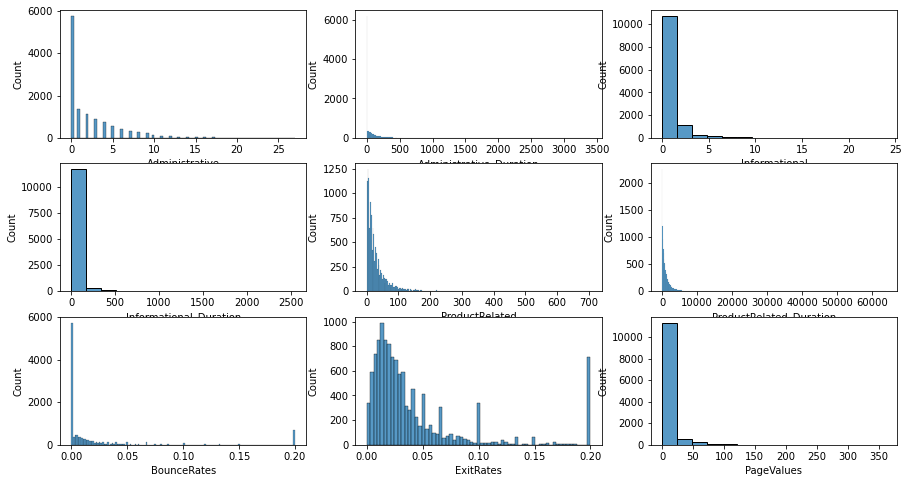

In [9]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
num = d1.select_dtypes(include = 'number')
a = 3
b = 3
c = 1
for i in num.columns:
    plt.subplot(a,b,c)
    sns.histplot(num.loc[:,i])
    plt.xlabel(i)
    c = c+1

## 1. Distribution plots clearly show that the variables are skewed and need transformation.

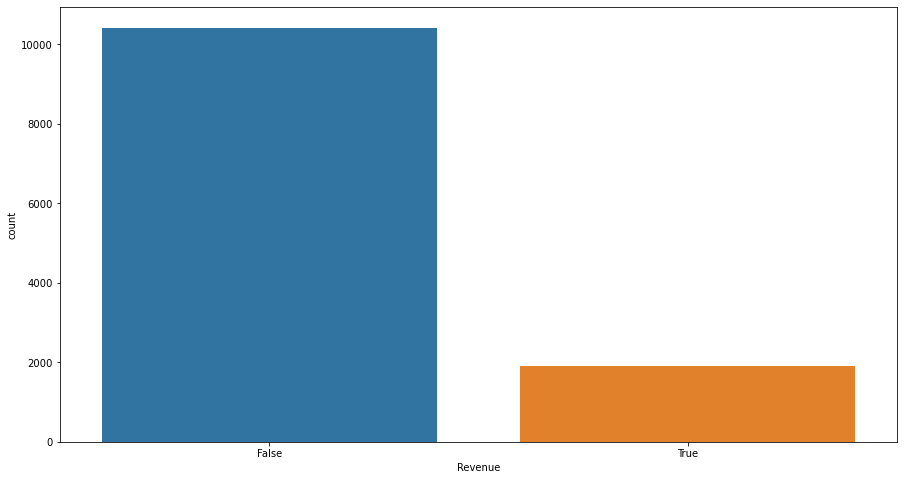

In [10]:
## countplot for target variable
sns.countplot(d1.Revenue)
plt.show()

Interpretation : The above plot clealry shows that target variable is imbalanced.

## Bivariate Analysis

### Q1 Which visitor type contributes to revenue more ?

In [11]:
d1.groupby('VisitorType')['Revenue'].value_counts()

VisitorType        Revenue
New_Visitor        False      1272
                   True        422
Other              False        69
                   True         16
Returning_Visitor  False      9081
                   True       1470
Name: Revenue, dtype: int64

<AxesSubplot:xlabel='Revenue'>

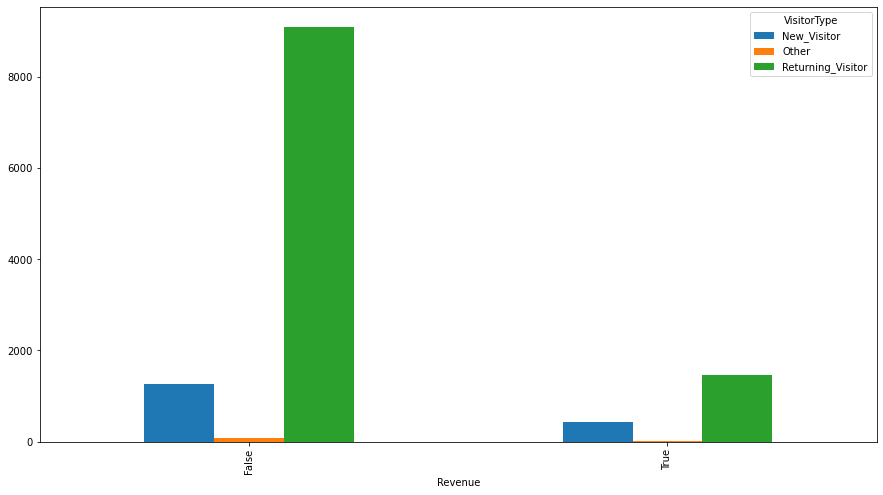

In [12]:
pd.crosstab(d1.Revenue, d1.VisitorType).plot(kind = 'bar')

Interpretation : 
1. We can see that only 1470 returning visitor generate revenue and almost 9081 
returning visitor do not generate revenue.

2. Among new visitors only 422 generate revenue and rest do not generate any revenue.

3. It can be clearly seen that the proportion of new vistor contributing to revenue is 
    more than proportion of returning visitor contributing to revenue.

### Q2 Does weekend leads to more revenue ?

<AxesSubplot:xlabel='Revenue'>

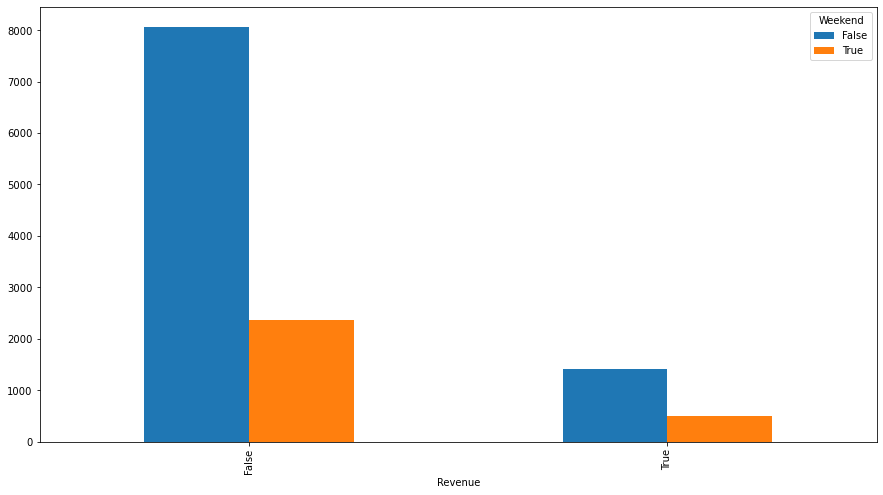

In [13]:
pd.crosstab(d1.Revenue,d1.Weekend).plot(kind = 'bar')

Interpretation : We can clearly see that if its's a weekend then the ideal thought of 
    having more revenue generation is not satisfied here.
    

### Q3 Which month contributes more towards revenue generation ?

<AxesSubplot:xlabel='Revenue'>

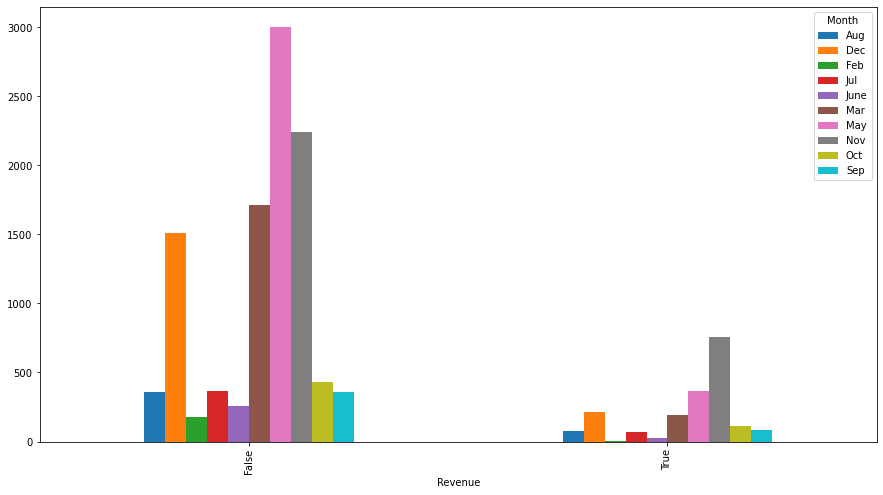

In [14]:
pd.crosstab(d1.Revenue,d1.Month).plot(kind = 'bar')

Interpretation :
    
    1. Though maximum times May month occurs but maximum revenue generation happens in the month of November.
    
    2. February and June have almost negligible sales.

### Q4 Which region contributes to revenue more ?

<AxesSubplot:xlabel='Revenue'>

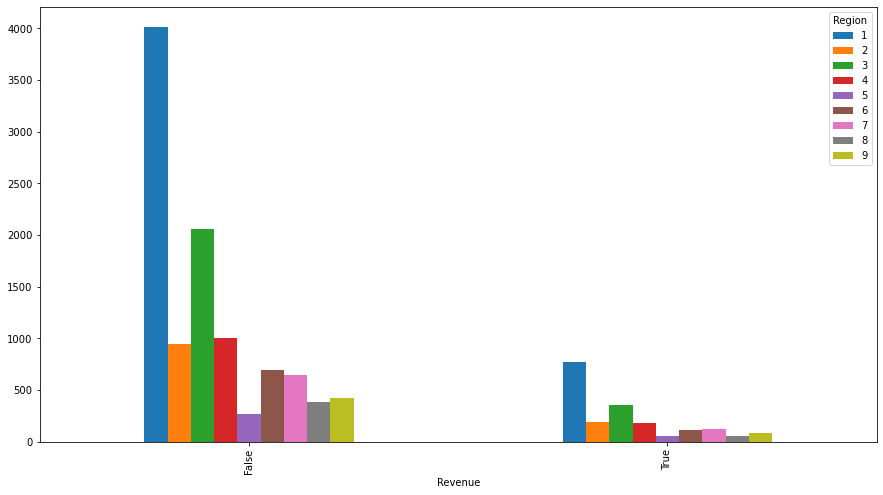

In [15]:
pd.crosstab(d1.Revenue,d1.Region).plot(kind = 'bar')

Interpretation : 
     We can see that region 1 occurs the maximum time and also contributes more towards revenue.

### Q5 Average page value and revenue generation 

<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

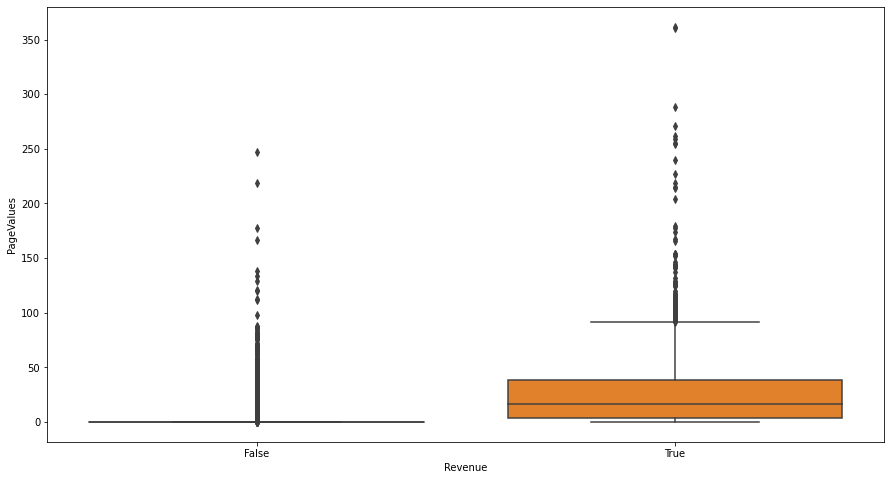

In [16]:
sns.boxplot(d1.Revenue,d1.PageValues)

Interpretation :
1. We can see that an average page-value of around 20 can be seen for generating revenue.
2. We can also see that there are a lot of outliers.

## Multivariate Analysis

### Q6 How to differntiate which type of visitor is serious and non-serious ?

<AxesSubplot:xlabel='VisitorType', ylabel='Administrative_Duration'>

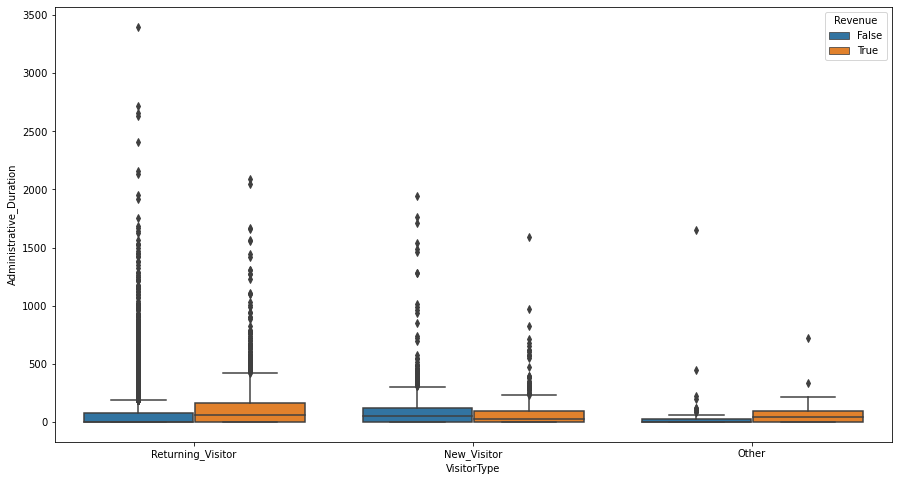

In [17]:
## for this question we will look at visitor type and administrative duration, informational duration and page related duration.
sns.boxplot(x="VisitorType",y="Administrative_Duration", data=d1,hue='Revenue')

<AxesSubplot:xlabel='VisitorType', ylabel='Informational_Duration'>

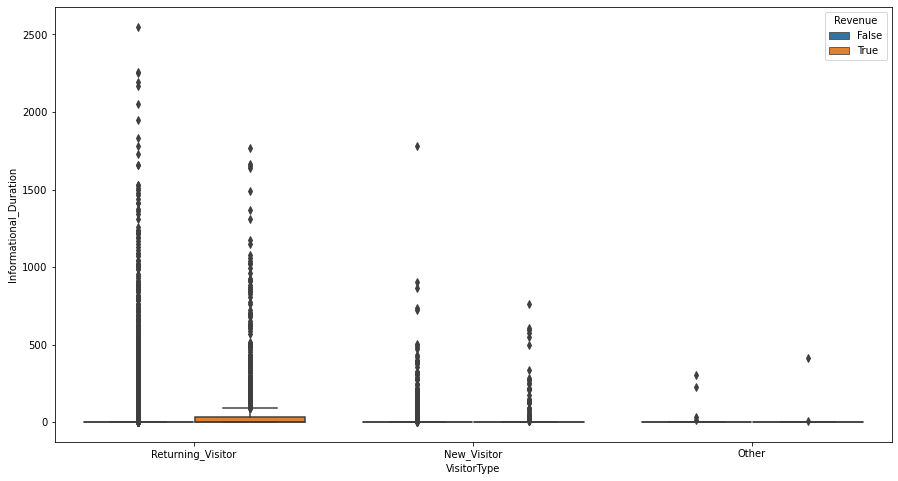

In [18]:
sns.boxplot(x="VisitorType",y="Informational_Duration", data=d1,hue='Revenue')

<AxesSubplot:xlabel='VisitorType', ylabel='ProductRelated_Duration'>

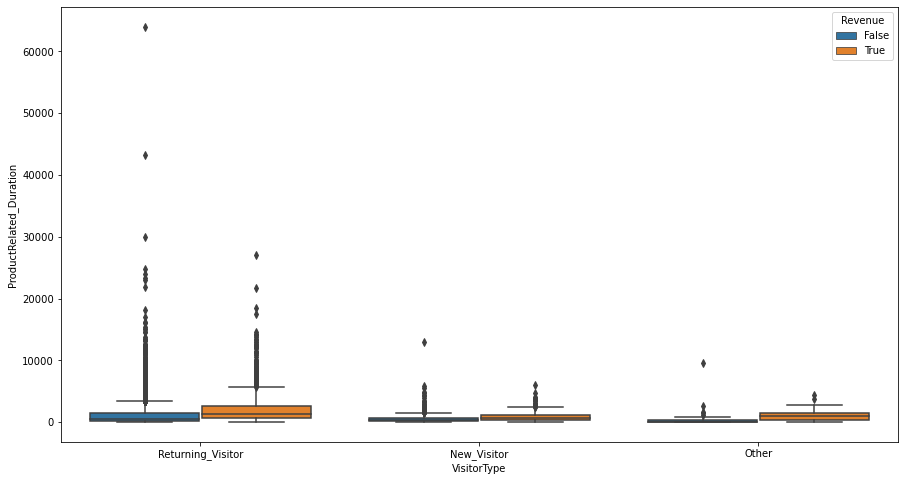

In [19]:
sns.boxplot(x="VisitorType",y="ProductRelated_Duration", data=d1,hue='Revenue')

Interpretation :
1. Returning visitors shows higher chance of buying a product and are serious customers.
2. Also customers who spent most time on product related page shows higher chance of buying a product.
3. In contrast, new visitors are hardly purchasing.
4. Only returning customers spent time on informational page and buys product

### ------------------------------------------------------------------------------------------------------------

### Checking for outliers

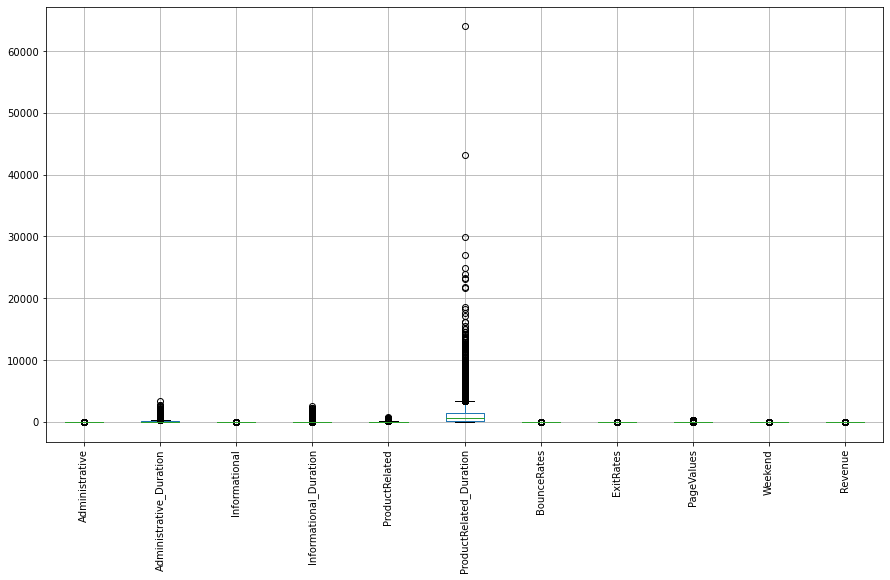

In [20]:
d1.boxplot()
plt.xticks(rotation = 90)
plt.show()

q3 = d1.quantile(0.75)
q1 = d1.quantile(0.25)
iqr = q3 - q1
d2 = d1[~((d1<(q1-1.5*iqr))|(d1>(q3+1.5*iqr))).any(axis = 1)]
d2.shape
### we will not remove outliers as a lot of information is being lost if we remove ouliers so we tend not to remove them.

## ----------------------------------------------------------------------------------------------------------------------------

# Model Building and Pre-processing

In [5]:
## splitting the dependent and independent variables
d1['Revenue']= d1['Revenue'].astype('int')
target = d1.Revenue
feature = d1.drop('Revenue', axis = 1)

In [6]:
## filtering numerical and categorical variables
num = feature.select_dtypes(include = 'number')
cat = feature.select_dtypes(include = 'object')

In [7]:
## scaling the numerical variables
sc = StandardScaler()
scaled = sc.fit_transform(num)
scaled = pd.DataFrame(data = scaled, columns = num.columns)

In [8]:
## encoding the categorical variables
encoded = pd.get_dummies(data = cat, drop_first = True)

In [9]:
scaled.reset_index(drop = True, inplace = True)
encoded.reset_index(drop = True, inplace = True)

In [10]:
## Concatenating numerical and dummy encoded categorical variables.
X = pd.concat([scaled,encoded],axis = 1)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_0.2,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,0,...,0,0,0,0,0,0,0,0,0,1


### Train-test split
Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(X,target, train_size = 0.3,random_state = 0)

## Base Model

In [12]:
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)
pred=model.predict(xtest)

In [13]:
print(classification_report(ytest,pred))
print(confusion_matrix(ytest,pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7271
           1       0.73      0.42      0.53      1360

    accuracy                           0.88      8631
   macro avg       0.82      0.69      0.73      8631
weighted avg       0.87      0.88      0.87      8631

[[7066  205]
 [ 795  565]]


### Interpretation :
1. Accurcay of this model is 88% which is not bad. 
2. Looking at the confusion matrix we see extreme identification, among almost 12000 customers the classification of true positives, false negatives, false positve is quite extreme.
3. Since this is a base model we have a lot of scope to improve as in this model we have amost 71 features, so ideally we should go for PCA. Introduction 
of Principal Component Analysis would reduce the curse of dimensionality.

# Applying Principal Component Analysis

Principal component analysis is a dimensionality reduction algorithm. Having too many dimensions(features) in data can sometimes act as noise and can cause difficulties. When we need a more realistic perspective and we have many features on a given data set we use PCA to reduce the curse of dimensionality.

In [71]:
cov_mat = np.cov(X.T)
eig_val, eig_vectors = np.linalg.eig(cov_mat)
print('Eigen Values',eig_val)
print('Eigen vectors', eig_vectors)

Eigen Values [3.41118945e+00 1.68449158e+00 1.03895609e+00 1.00592542e+00
 9.45531170e-01 4.23284128e-01 3.57249237e-01 3.20427120e-01
 2.96302546e-01 2.82037819e-01 2.09669116e-01 1.88838014e-01
 1.66392386e-01 1.43905627e-01 1.26724814e-01 1.21348922e-01
 1.11780715e-01 9.36301925e-02 7.94473040e-02 7.47480487e-02
 7.39764440e-02 6.91490772e-02 6.42086898e-02 6.04744985e-02
 5.07839494e-02 4.63439885e-02 4.42233525e-02 4.07471724e-02
 3.92436897e-02 3.54055145e-02 3.42282412e-02 3.28311545e-02
 3.01924748e-02 2.89531522e-02 2.74148145e-02 2.51830114e-02
 2.42102207e-02 2.31013652e-02 2.18527000e-02 1.99664565e-02
 1.96896014e-02 1.88247013e-02 1.82180748e-02 1.58098518e-02
 1.36240099e-02 1.29959454e-02 1.13563764e-02 1.02839751e-02
 9.25196688e-03 9.16231390e-03 7.02138553e-03 5.05870597e-03
 3.50212647e-03 3.28959013e-03 3.16329613e-03 2.99369250e-03
 2.91540920e-03 2.21535648e-03 1.43510480e-03 1.35073131e-03
 1.11933323e-03 1.04606425e-03 5.63896464e-04 8.83748264e-04
 8.02225590

In [72]:
variation = []
for i in eig_val:
    variation.append(i/np.sum(eig_val)*100)

In [73]:
cum_var = np.cumsum(variation)

## Logistic Regression for Classification

In [74]:
for i in range(3,11):
    pca = PCA(n_components = i, random_state = 0)
    pca_da = pca.fit_transform(X)
    xtrain,xtest, ytrain,ytest = train_test_split(pca_da,target,train_size = 0.2, random_state = 0)
    lr = LogisticRegression()
    pred = lr.fit(xtrain,ytrain).predict(xtest)
    print(i, '\n', confusion_matrix(ytest,pred))
    print('\n', classification_report(ytest,pred))

3 
 [[8188  134]
 [1270  272]]

               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8322
           1       0.67      0.18      0.28      1542

    accuracy                           0.86      9864
   macro avg       0.77      0.58      0.60      9864
weighted avg       0.84      0.86      0.82      9864

4 
 [[8229   93]
 [1242  300]]

               precision    recall  f1-score   support

           0       0.87      0.99      0.92      8322
           1       0.76      0.19      0.31      1542

    accuracy                           0.86      9864
   macro avg       0.82      0.59      0.62      9864
weighted avg       0.85      0.86      0.83      9864

5 
 [[8125  197]
 [ 955  587]]

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      8322
           1       0.75      0.38      0.50      1542

    accuracy                           0.88      9864
   macro avg       0.82      

In [75]:
# Stratified cross validation : it mostly used when data is imbalanced
skf=StratifiedKFold(n_splits=10,shuffle=True)
skfscore=cross_val_score(lr,X,target,cv=skf)
print(skfscore)
print(skfscore.mean())

[0.89618816 0.8783455  0.89132198 0.87591241 0.88158962 0.88402271
 0.89213301 0.87672344 0.88321168 0.88321168]
0.8842660178426602


### Interpretation :
1. Accuracy of a model describes the sum of true positives and true negatives divided by total samples. In the above logistic regression model
we can see that accuracy is 88% for n_components greater than 4 and is 86% for n_components less than 4, but since our data is imbalanced thus trusting accuracy is not a good method.

2. Talking about the precison score it is the ability of a classifier not to label an instance positive that is actually negative. It simply means 
the accuracy of positive predictions. In online business when a firm looks to identify whether a customer would generate revenue with the given parameters
it is important for them to know how good is the precision score. For our dataset, since it is imbalanced the values for precision score aren't quite satisfying in identyfying whether revenue is 
genereated or not. We can see that from n_components is 5 all the preciison values are either 74% or 75% when revenue is 1.

3. Talking about the recall score it is the ability of a classifier to find all positive instances. In simplier terms, recall score 
is fraction of positives that were correctly identified. In online business when a firm looks to identify whether a customer would generate revenue with the given parameters
it is important for them to know how good is the recall score. For our dataset, since it is imbalanced the values for recall score aren't quite satisfying in identyfying whether revenue is 
genereated or not. We can see that from n_components is 5 all the recall values are either 38% or 39% when revenue is 1.

4. Similarly for the F1 score (harmonic mean of precision and recall score) of an online business is varying a lot for when revenue is genereated and when revenue is not 
generated. Thus, we can clearly see the negative impact of dataset being imbalanced. We can see that from n_components is 5 all the F1 score values are either 50% or 51% when revenue is 1.

5. Looking at the cross-val score we can see that average accuracy is 88% for logistic regression classifier. Hence, our results are validated by this average that accuracy in this model is 88%.

6. After looking at all parameters we can say that after n_components is 5 all the results are pretty similar, hence ideal value of n_components in logistic regression is 5.

6. For an online business if a customer can generate revenue and model idetifies it as false negative then it can cost a lot of revenue. As seen in confusion matrix we have extremely poor performance in correctly classifiying customers. Thus, low recall score and low precision score for identifying if revenue generated is worissome.

## Random-Forest for classification

In [76]:
for i in range(3,11):
    pca = PCA(n_components = i, random_state = 0)
    pca_da = pca.fit_transform(X)
    xtrain,xtest, ytrain,ytest = train_test_split(pca_da,target,train_size = 0.2, random_state = 0)
    rf = RandomForestClassifier()
    pred = rf.fit(xtrain,ytrain).predict(xtest)
    print(i, '\n', confusion_matrix(ytest,pred))
    print('\n', classification_report(ytest,pred))

3 
 [[8083  239]
 [1051  491]]

               precision    recall  f1-score   support

           0       0.88      0.97      0.93      8322
           1       0.67      0.32      0.43      1542

    accuracy                           0.87      9864
   macro avg       0.78      0.64      0.68      9864
weighted avg       0.85      0.87      0.85      9864

4 
 [[8119  203]
 [1038  504]]

               precision    recall  f1-score   support

           0       0.89      0.98      0.93      8322
           1       0.71      0.33      0.45      1542

    accuracy                           0.87      9864
   macro avg       0.80      0.65      0.69      9864
weighted avg       0.86      0.87      0.85      9864

5 
 [[8019  303]
 [ 785  757]]

               precision    recall  f1-score   support

           0       0.91      0.96      0.94      8322
           1       0.71      0.49      0.58      1542

    accuracy                           0.89      9864
   macro avg       0.81      

In [43]:
skf=StratifiedKFold(n_splits=10,shuffle=True)
skfscore=cross_val_score(rf,X,target,cv=skf)
print(skfscore)
print(skfscore.mean())

[0.89699919 0.90105434 0.89781022 0.90105434 0.90510949 0.90673155
 0.90105434 0.9026764  0.89537713 0.90997567]
0.9017842660178428


### Interpretation :
    
1. In the above random forest classifier model we can see that accuracy has increased to only 89% for n_components greater than 6 and 87% when n_components is either 3 or 4. But since again our data is imbalanced thus trusting accuracy is not a good method.

2. Talking about the precison score for our dataset, since it is imbalanced the values for precision score vary a lot and aren't quite satisfying in identyfying whether revenue is genereated or not. We can see that when n_components is 8 precision score is 74% rest for all the n_componets after 5 precisison values are either 72% or 71% when revenue is 1.

3. Talking about the recall score for our dataset, since it is imbalanced the values for recall score aren't quite satisfying in identyfying whether revenue is genereated or not. We can see that from n_components 5 recall score lies in range 45% to 49%  when revenue is 1.

4. Similarly for the F1 score (harmonic mean of precision and recall score) of an online business is varying a lot for when revenue is genereated and when revenue is not generated. Thus, we can clearly see the negative impact of dataset being imbalanced. We can see that from n_components 5 F1 score lies in range 56% to 58% rest when revenue is 1.

5. Looking at the cross-val score we can see that average accuracy is 89% for random forest classifier.Hence, our results are validated by this average that accuracy in this model is close to 90%.

6. Under this model, since maximum values for precision, recall and F1 score vary in different components thus after closely looking at all the ranges for each score we can say that when n_component is 5 or 6 we get the best precision, recall and F1 score.

7. Though, after introducing random forest classifier in confusion matrix we have improved a bit but still we can see poor performance in correctly classifiying customers. Precison, recall and F1 score have increased a bit but are still low for predicting if revenue generated or not.

## LightGBM model

In [77]:
for i in range(3,11):
    pca = PCA(n_components = i, random_state = 0)
    pca_da = pca.fit_transform(X)
    xtrain,xtest, ytrain,ytest = train_test_split(pca_da,target,train_size = 0.2, random_state = 0)
    lgbm=lgm.LGBMClassifier()
    pred = lgbm.fit(xtrain,ytrain).predict(xtest)
    print(i, '\n', confusion_matrix(ytest,pred))
    print('\n', classification_report(ytest,pred))

3 
 [[7965  357]
 [ 999  543]]

               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8322
           1       0.60      0.35      0.44      1542

    accuracy                           0.86      9864
   macro avg       0.75      0.65      0.68      9864
weighted avg       0.84      0.86      0.85      9864

4 
 [[8019  303]
 [1002  540]]

               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8322
           1       0.64      0.35      0.45      1542

    accuracy                           0.87      9864
   macro avg       0.76      0.66      0.69      9864
weighted avg       0.85      0.87      0.85      9864

5 
 [[7908  414]
 [ 736  806]]

               precision    recall  f1-score   support

           0       0.91      0.95      0.93      8322
           1       0.66      0.52      0.58      1542

    accuracy                           0.88      9864
   macro avg       0.79      

In [78]:
skf=StratifiedKFold(n_splits=10,shuffle=True)
skfscore=cross_val_score(lgbm,X,target,cv=skf)
print(skfscore)
print(skfscore.mean())

[0.91159773 0.89375507 0.9026764  0.90186537 0.89618816 0.90186537
 0.89294404 0.9107867  0.90348743 0.90429846]
0.9019464720194647


### Interpretation :
1. In the above lightgbm classifier model we can see that accuracy has increased to only 89% for n_components greater than 7 and 88% when n_components is either 5 or 6. But since again our data is imbalanced thus trusting accuracy is not a good method.

2. We can see that when n_components is greater than 7 precision score is 68% to 70% and when n_componets is either 5 or 6 precision values is 66% and 68% when revenue is 1.

3. We can see that when n_components is greater than 7 recall score is 50% to 52% and when n_componets is either 5 or 6 recall values is 52% and 49% when revenue is 1.

4. We can see that when n_components is greater than 7 F1 score score is 58% or 59% and when n_componets is either 5 or 6 F1 score is 57% and 58% when revenue is 1.

5. Looking at the cross-val score we can see that average accuracy is 90% for lightgbm classifier. Hence, our results are validated by this average that accuracy in this model is close to 90%.

6. Under this model, since maximum values for precision, recall and F1 score vary in different components thus after closely looking at all the ranges for each score we can say that when n_component is 6 or 7 we get the almost similar precision, recall and F1 score with 1% here and there.

7. While looking at confusion matrix in this model we can also see that there is very minor 
difference in false negative and true positives. This means that if an online business follows this 
model to predict if a customer will generate revenue he would have almost similar values for wrongly 
identyfying revenue generating customers and truely indentfying a customer will generate reveue.

### Final Interpretation:
    
1. While comparing results for all our models we can see that accuracy for each model has been around 89% to 90%, which is a good fit. The 
introduction of cross-val in model was to identify which model gives best average accuracy and works best for online business 
owners to correctly predict revenue generating customers so that the marketing team works best to capture these customers.


2. While plotting the roc curve for all the models below, we can see that Random Forest Classifier and Logistic Regression model have a close tie in ROC curve.


3. After looking at all parameters we can say that Random Forest Classifier is the best model as it gives the best accuracy and has a good auc score.


3. Since, our target varibale is imbalanced we could see it's effect on our results as the variation in recall, precison and F1 score was quite high 
for classifiying revenue generating customers.


4. Our results would have been much better if we had a balanced dataset, this is proved by us below as when we took a perfectly balanced random sample of 4000 customers
we saw that this model works best and have a good recall, precision and F1 score. For a basic random forest model the variation of all the three scores is very nominal, thus our small experiment clearly indicates that our modelling and results are great according to the imbalanced dataset we have. A balanced dataset is what we need to improve recall, F1 or precision score.


5. Our model is very helpful for online business owners as in current times everything is shifting online. Offline purchasing owners have advantage of interacting with the customer which tells them a lot about whether
that customer would purchase an item or not, but in online business customers information can only seen through his online behaviour. Thus it becomes really important to understand the customer's intention of whether he would 
generate revenue or not and accordingly business owners can use their marketing strategies to target potential customers by giving them better discounts etc.


6. The only limitation that we think of our model is that if we had a balanced dataset it would have worked so much better in identifying revenue generating customers.

## Plotting the ROC curve

In [79]:
classifier1 = LogisticRegression()
classifier2 = RandomForestClassifier()
classifier3 = lgm.LGBMClassifier()
probas1_ = classifier1.fit(xtrain, ytrain).predict_proba(xtest)
probas2_ = classifier2.fit(xtrain, ytrain).predict_proba(xtest)
probas3_ = classifier3.fit(xtrain, ytrain).predict_proba(xtest)

In [80]:
## Compute ROC curve and area the curve for logistic Regression 
fpr1, tpr1, thresholds1 = roc_curve(ytest, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve for Logistic Regression : %f" % roc_auc1)
## Compute ROC curve and area the curve for Random Forest Classifier
fpr2, tpr2, thresholds2 = roc_curve(ytest, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve for Random Forest : %f" % roc_auc2)
## Compute ROC curve and area the curve for LightGBM Classifier
fpr3, tpr3, thresholds3 = roc_curve(ytest, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve for LightGBM : %f" % roc_auc3)

Area under the ROC curve for Logistic Regression : 0.892741
Area under the ROC curve for Random Forest : 0.890619
Area under the ROC curve for LightGBM : 0.890456


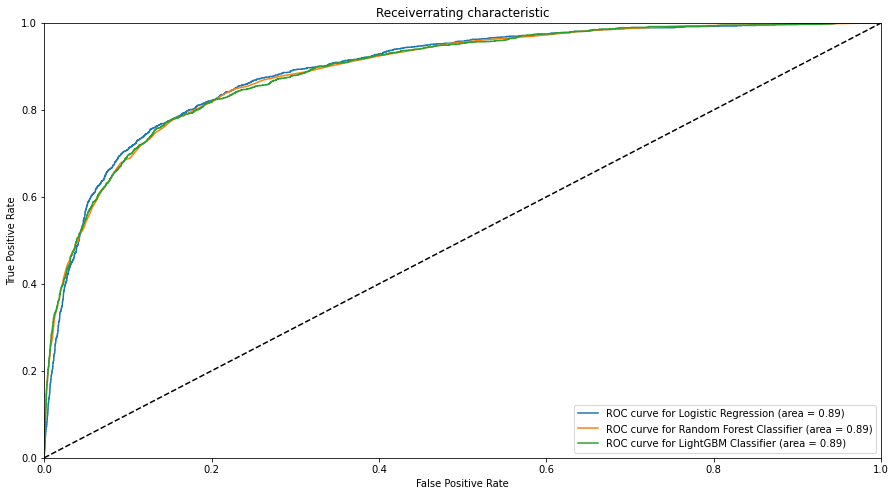

In [81]:
# Ploting the ROC
# Ploting ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for Random Forest Classifier (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for LightGBM Classifier (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic')
pl.legend(loc="lower right")
pl.show()

# Checking our results if we had a balanced dataset

In [49]:
d1_0=d1[d1['Revenue']==0]

In [50]:
## creating a sample of 1908 customers who didn't generate revenue.
d1_0samp=d1_0.sample(n=1908,ignore_index=True)

In [51]:
## creating a table for 1908 customers who generated revenue
d1_1=d1[d1.Revenue.isin([1])]
d1_1.reset_index(drop=True,inplace=True)

In [52]:
new=pd.concat([d1_0samp,d1_1]).reset_index(drop=True)
new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,6,96.0,6,251.666667,16,261.000000,0.012821,0.029872,0.000000,0.0,Nov,3,2,7,1,Returning_Visitor,True,0
1,3,52.9,0,0.000000,8,278.580000,0.000000,0.010000,26.181807,0.0,Jul,1,1,1,2,New_Visitor,False,0
2,3,166.0,0,0.000000,2,134.000000,0.000000,0.030000,0.000000,0.8,May,3,2,8,2,Returning_Visitor,False,0
3,0,0.0,0,0.000000,1,0.000000,0.200000,0.200000,0.000000,0.0,Sep,1,1,2,2,Returning_Visitor,False,0
4,1,29.0,0,0.000000,25,381.357143,0.000000,0.004167,0.000000,0.8,May,2,2,1,2,New_Visitor,False,0


In [53]:
new.Revenue.value_counts()
## we can see that we have equal number of both categories.

0    1908
1    1908
Name: Revenue, dtype: int64

## Building a model on this dataset

In [54]:
target = new.Revenue
feature = new.drop('Revenue', axis = 1)

In [55]:
## filtering numerical and categorical variables
num = feature.select_dtypes(include = 'number')
cat = feature.select_dtypes(include = 'object')

In [56]:
## scaling the numerical variables
sc = StandardScaler()
scaled = sc.fit_transform(num)
scaled = pd.DataFrame(data = scaled, columns = num.columns)

In [57]:
## encoding the categorical variables
encoded = pd.get_dummies(data = cat, drop_first = True)

In [58]:
scaled.reset_index(drop = True, inplace = True)
encoded.reset_index(drop = True, inplace = True)

In [59]:
X = pd.concat([scaled,encoded],axis = 1)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay_0.2,...,TrafficType_11,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0.924493,0.005048,3.994002,1.301288,-0.438133,-0.589386,-0.058805,-0.087026,-0.511826,0,...,0,0,0,0,0,0,0,0,0,1
1,0.065086,-0.237162,-0.452928,-0.277643,-0.593503,-0.580772,-0.387205,-0.575046,0.402105,0,...,0,0,0,0,0,0,0,0,0,0
2,0.065086,0.398428,-0.452928,-0.277643,-0.710031,-0.651614,-0.387205,-0.083877,-0.511826,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.794321,-0.534445,-0.452928,-0.277643,-0.729452,-0.717272,4.735834,4.091059,-0.511826,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.507852,-0.371473,-0.452928,-0.277643,-0.263342,-0.530413,-0.387205,-0.718304,-0.511826,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(X,target, train_size = 0.3,random_state = 0)

In [61]:
for i in range(3,11):
    pca = PCA(n_components = i, random_state = 0)
    pca_da = pca.fit_transform(X)
    xtrain,xtest, ytrain,ytest = train_test_split(pca_da,target,train_size = 0.2, random_state = 0)
    rf = RandomForestClassifier()
    pred = rf.fit(xtrain,ytrain).predict(xtest)
    print(i, '\n', confusion_matrix(ytest,pred))
    print('\n', classification_report(ytest,pred))

3 
 [[1104  419]
 [ 526 1004]]

               precision    recall  f1-score   support

           0       0.68      0.72      0.70      1523
           1       0.71      0.66      0.68      1530

    accuracy                           0.69      3053
   macro avg       0.69      0.69      0.69      3053
weighted avg       0.69      0.69      0.69      3053

4 
 [[1170  353]
 [ 532  998]]

               precision    recall  f1-score   support

           0       0.69      0.77      0.73      1523
           1       0.74      0.65      0.69      1530

    accuracy                           0.71      3053
   macro avg       0.71      0.71      0.71      3053
weighted avg       0.71      0.71      0.71      3053

5 
 [[1274  249]
 [ 386 1144]]

               precision    recall  f1-score   support

           0       0.77      0.84      0.80      1523
           1       0.82      0.75      0.78      1530

    accuracy                           0.79      3053
   macro avg       0.79      

Interpretation :
1. We can clearly see that for a basic random forest model without even tuning our results have improved a lot when we had a balanced dataset. Recall, Precsion score have shown a major 
improvement when we took a balanced dataset.
2. Looking at the confusion matrix we can see our our false negatives have reduced a lot, which is a very good sign.

In [1]:
a=' i live in delhi'
a[::-1]

'ihled ni evil i '

In [1]:
fruits = ["apple", "banana", "cherry"]


In [5]:
fruits.remove("banana")

In [8]:

def fruits(x):
    for i in x:
        i=i+1
        if x=='banana'
        print(i)

SyntaxError: invalid syntax (Temp/ipykernel_10396/2463997707.py, line 4)